

###    In order to answer the question in how many 28 day period a driver will churn, it is
###    crucial to mention that it follows a geometric distribution. The expected value represents the 
###    average lifetime of a driver:
                                        E(X)=1/probability_of_churn

# Libraries to model the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, LogisticRegression

import pylab 
pylab.rcParams['figure.figsize'] = 12, 8

% matplotlib inline 

# Loading the Data

#### It's crucial to keep in mind that there is a class imbalance
    
    14.5% of the total drivers churned the second 28 days period

In [127]:
total_value = pd.read_pickle('/Users/Hedi/Documents/total_value_per_driver.pickle')

In [2]:
churn_df = pd.read_pickle('/Users/Hedi/Documents/churn_df.pickle')

In [3]:
churn_df.head()

,driver_id,#_rides,first_28_days_revenue_$,#_active_days,%_prime_time,second_28_days_revenue_$,Churn_2nd_period,retention,bucket_by_500
0,002be0ffdc997bd5c50703158b7c2491,109,1090.035053,21,0.376147,508.093372,0,1,2.0
1,007f0389f9c7b03ef97098422f902e62,7,67.431463,3,0.428571,122.814027,0,1,0.0
2,011e5c5dfc5c2c92501b8b24d47509bc,12,144.589610,5,0.416667,222.343912,0,1,0.0
3,0152a2f305e71d26cc964f8d4411add9,56,626.121248,15,0.214286,1086.718766,0,1,1.0
4,01674381af7edd264113d4e6ed55ecda,176,2045.983642,20,0.261364,2312.106739,0,1,4.0


In [4]:
# The class imbalance is highlighted here

churn_df['Churn_2nd_period'].value_counts()

0    552
1     94
Name: Churn_2nd_period, dtype: int64

#### The features to predict driver's churn are:
      Number of rides
      The total ride price per driver
      The number of active days (at least one ride)
      The percentage of rides with prime time

In [112]:
X_all = churn_df[[col for col in churn_df.columns if col not in ['driver_id','second_28_days_revenue_$','retention','bucket_by_500','Churn_2nd_period']]]
target = churn_df['Churn_2nd_period']

In [113]:
X_all

,#_rides,first_28_days_revenue_$,#_active_days,%_prime_time
0,109,1090.035053,21,0.376147
1,7,67.431463,3,0.428571
2,12,144.589610,5,0.416667
3,56,626.121248,15,0.214286
4,176,2045.983642,20,0.261364
5,203,2122.221022,22,0.241379
6,110,1276.728839,18,0.300000
7,47,531.727806,11,0.212766
8,53,613.390620,21,0.113208
9,29,246.664435,17,0.275862


#### The data is randomly splitted into train & test

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_all,target,test_size=0.3)

# ------------------------------------------------------------------

### The modeling step always start with the simplest model:
     Logistic Regression

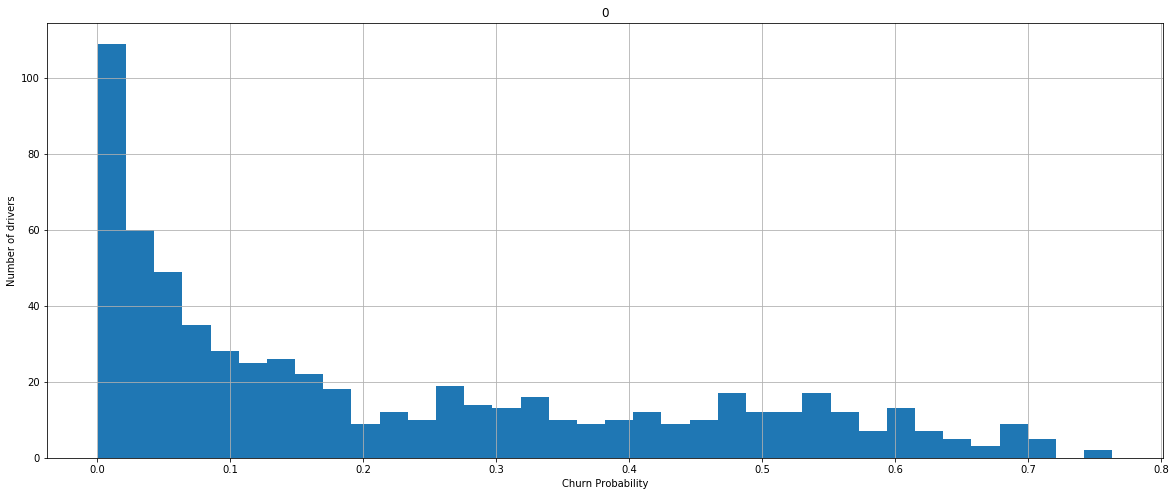

In [126]:
#ndrivers = len(drivers['driver_id'])
churn_proba.hist(column=0, bins=36, figsize=(20,8))
plt.xlabel("Churn Probability")
plt.ylabel("Number of drivers")
#plt.title("The percentage of drivers VS number of rides per day")
plt.savefig('Churn_probability.png')
plt.show()

In [119]:
churn_proba = pd.DataFrame([x[1] for x in lr.predict_proba(X_all)])

In [124]:
churn_proba.describe()

,0
count,646.000000
mean,0.220663
std,0.208331
min,0.000513
25%,0.040045
50%,0.143325
75%,0.381939
max,0.763167


In [131]:
driver_value_churn_proba = pd.concat([total_value,churn_proba],axis=1)

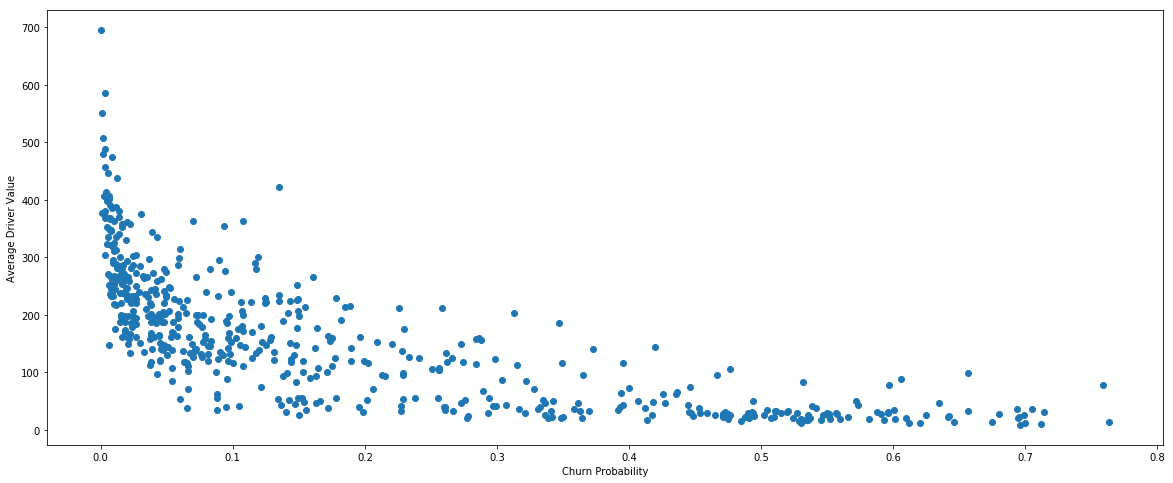

In [138]:
#fig = figsize=(20,8)
plt.figure(figsize=(20,8))
plt.scatter(x=churn_proba[0],y=total_value['Average_value'])
plt.xlabel("Churn Probability")
plt.ylabel("Average Driver Value")
plt.savefig('Avegra_value_Churn_probability.png')

In [132]:
total_value

,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period,Average_value
0,002be0ffdc997bd5c50703158b7c2491,159.979444,81.754086,120.866765
1,007f0389f9c7b03ef97098422f902e62,10.381103,17.614865,13.997984
2,011e5c5dfc5c2c92501b8b24d47509bc,21.479794,32.603341,27.041567
3,0152a2f305e71d26cc964f8d4411add9,86.499899,152.616353,119.558126
4,01674381af7edd264113d4e6ed55ecda,283.239602,321.427013,302.333307
5,0213f8b59219e32142711992ca4ec01f,297.822754,50.952769,174.387761
6,0258e250ca195cc6258cbdc75aecd853,180.904391,268.617885,224.761138
7,02e440f6c209206375833cef02e0cbae,74.378047,18.265971,46.322009
8,036f3d94e7c65e4e3574822d31c72656,80.913112,124.147285,102.530198
9,039c5afbca8e03e4c18d9c8ea94140ac,35.132095,15.290658,25.211376


In [115]:
lr= LogisticRegression(class_weight={0:1,1:2})
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [116]:
lr.predict_proba(X_all)

array([[ 0.95545602,  0.04454398],
       [ 0.35434495,  0.64565505],
       [ 0.44847511,  0.55152489],
       ..., 
       [ 0.94561413,  0.05438587],
       [ 0.9826513 ,  0.0173487 ],
       [ 0.72235187,  0.27764813]])

In [65]:
# The expected lifetime is equal to 1/probabaility_of_churn 

lifetime_28_days_period = ([1/x[1] for x in lr.predict_proba(X_all)])

In [67]:
X_all['Driver_Lifetime']= lifetime_28_days_period

In [68]:
X_all['driver_id']= churn_df['driver_id']

In [69]:
X_all

,#_rides,first_28_days_revenue_$,#_active_days,%_prime_time,Driver_Lifetime,driver_id
0,109,1090.035053,21,0.376147,25.461677,002be0ffdc997bd5c50703158b7c2491
1,7,67.431463,3,0.428571,1.629652,007f0389f9c7b03ef97098422f902e62
2,12,144.589610,5,0.416667,1.859316,011e5c5dfc5c2c92501b8b24d47509bc
3,56,626.121248,15,0.214286,5.548855,0152a2f305e71d26cc964f8d4411add9
4,176,2045.983642,20,0.261364,54.718171,01674381af7edd264113d4e6ed55ecda
5,203,2122.221022,22,0.241379,98.075197,0213f8b59219e32142711992ca4ec01f
6,110,1276.728839,18,0.300000,17.268756,0258e250ca195cc6258cbdc75aecd853
7,47,531.727806,11,0.212766,3.431075,02e440f6c209206375833cef02e0cbae
8,53,613.390620,21,0.113208,9.182557,036f3d94e7c65e4e3574822d31c72656
9,29,246.664435,17,0.275862,5.102093,039c5afbca8e03e4c18d9c8ea94140ac


In [70]:
value_per_driver = pd.read_pickle('/Users/Hedi/Documents/LYFT_HEDI/total_value_per_driver.pickle')

In [71]:
driver_lifetime_value = pd.merge(X_all,value_per_driver,how='inner',on='driver_id')

In [72]:
driver_lifetime_value['Driver_lifetime_value'] = driver_lifetime_value['Driver_Lifetime'] * driver_lifetime_value['Average_value']

In [84]:
driver_lifetime_value.head(30)

,#_rides,first_28_days_revenue_$,#_active_days,%_prime_time,Driver_Lifetime,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period,Average_value,Driver_lifetime_value
0,109,1090.035053,21,0.376147,25.461677,002be0ffdc997bd5c50703158b7c2491,159.979444,81.754086,120.866765,3077.470575
1,7,67.431463,3,0.428571,1.629652,007f0389f9c7b03ef97098422f902e62,10.381103,17.614865,13.997984,22.811843
2,12,144.589610,5,0.416667,1.859316,011e5c5dfc5c2c92501b8b24d47509bc,21.479794,32.603341,27.041567,50.278815
3,56,626.121248,15,0.214286,5.548855,0152a2f305e71d26cc964f8d4411add9,86.499899,152.616353,119.558126,663.410679
4,176,2045.983642,20,0.261364,54.718171,01674381af7edd264113d4e6ed55ecda,283.239602,321.427013,302.333307,16543.125732
5,203,2122.221022,22,0.241379,98.075197,0213f8b59219e32142711992ca4ec01f,297.822754,50.952769,174.387761,17103.114107
6,110,1276.728839,18,0.300000,17.268756,0258e250ca195cc6258cbdc75aecd853,180.904391,268.617885,224.761138,3881.345363
7,47,531.727806,11,0.212766,3.431075,02e440f6c209206375833cef02e0cbae,74.378047,18.265971,46.322009,158.934291
8,53,613.390620,21,0.113208,9.182557,036f3d94e7c65e4e3574822d31c72656,80.913112,124.147285,102.530198,941.489359
9,29,246.664435,17,0.275862,5.102093,039c5afbca8e03e4c18d9c8ea94140ac,35.132095,15.290658,25.211376,128.630787


#### Because there are some outliers, the median was chosen to represent the driver lifetime value.

In [73]:
driver_lifetime_value['Driver_lifetime_value'].median()

1654.5574973738312

# --------------------------------------------------

#### A second model called Random Forest Classifier is used to get the importance of each feature
    
    A quick analysis shows that the number of active days is strong predictor
    followed by the total ride price, the number of rides and finally the % of prime time

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [75]:
def significance(cols):
    if cols['p-value']<0.001:
        return '***'
    if cols['p-value']<0.01:
        return '**'
    if cols['p-value']<0.1:
        return '*'
    else:
        return ''

In [79]:
c=feature_selection.f_classif(X_train,y_train)[1].tolist()
summary=pd.concat([pd.DataFrame(data=np.transpose(abs(rfc.feature_importances_)),index=X_all.iloc[:,:4].columns,
                                columns=['Coef']), pd.DataFrame(c,index=X_all.iloc[:,:4].columns,columns=['p-value'])], axis=1)
summary['significance']=pd.DataFrame(summary.apply(significance,axis=1))
    
df_relevant_feature_rfc = summary.sort_values(by='p-value',ascending=True)
df_relevant_feature_rfc

,Coef,p-value,significance
#_active_days,0.238622,3.341798e-16,***
first_28_days_revenue_$,0.268421,2.680285e-11,***
#_rides,0.315033,3.734848e-11,***
%_prime_time,0.177924,1.273518e-03,**


In [96]:
xx, yy = np.mgrid[0:2000:500, 0:30:1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

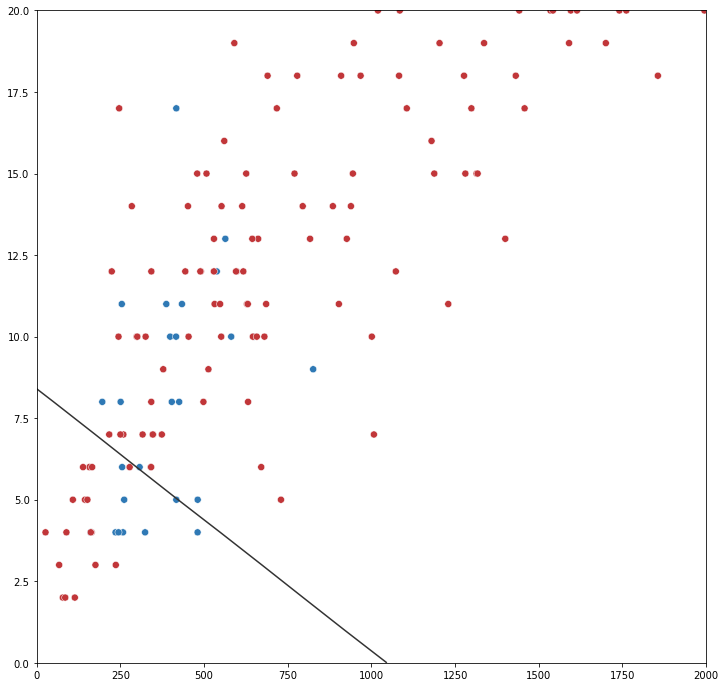

In [111]:
f, ax = plt.subplots(figsize=(12, 12))
ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X_all.iloc[:200,0], X_all.iloc[:200, 1], c=target.iloc[:200], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=0.5)

ax.set(
       xlim=(0, 2000), ylim=(0, 20))
plt.savefig('LR.png')
plt.show()

[(0, 40),
 (0, 100),
 None]

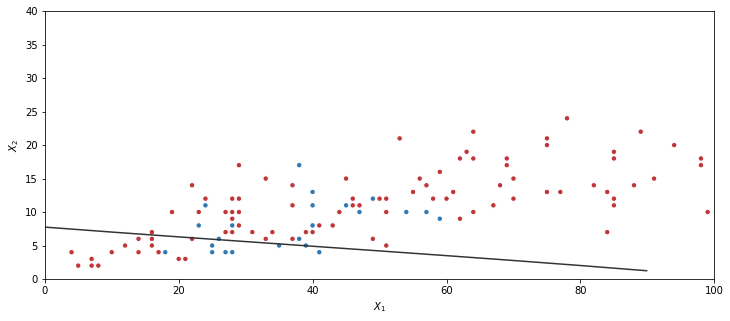

In [78]:
f, ax = plt.subplots(figsize=(12, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X_all.iloc[:200,0], X_all.iloc[:200, 1], c=target.iloc[:200], s=30,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(0, 100), ylim=(0, 40),
       xlabel="$X_1$", ylabel="$X_2$")

[(0, 1000),
 (0, 5000),
 None]

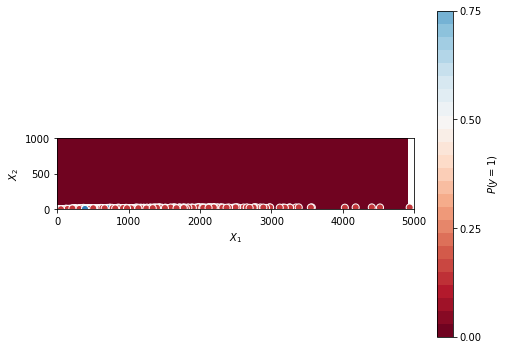

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_all.iloc[:,0], X_all.iloc[:, 1], c=target.iloc[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(0, 5000), ylim=(0,1000),
       xlabel="$X_1$", ylabel="$X_2$")